<a href="https://colab.research.google.com/github/SmdZubair0/OIBSIP/blob/main/CarPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CarPrice.csv")

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='symboling', ylabel='price'>

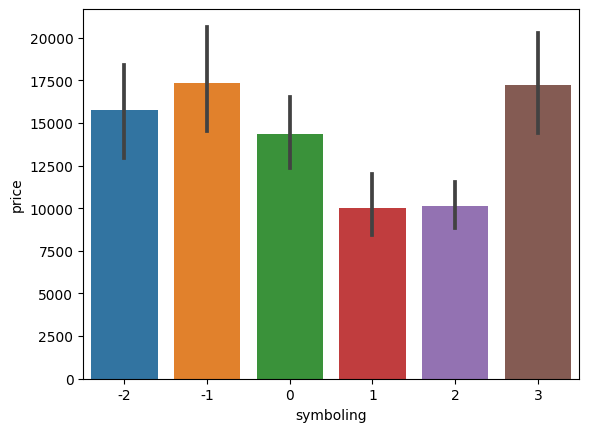

In [ ]:
sns.barplot(x=df['symboling'],y=df['price'])

<Axes: xlabel='aspiration', ylabel='price'>

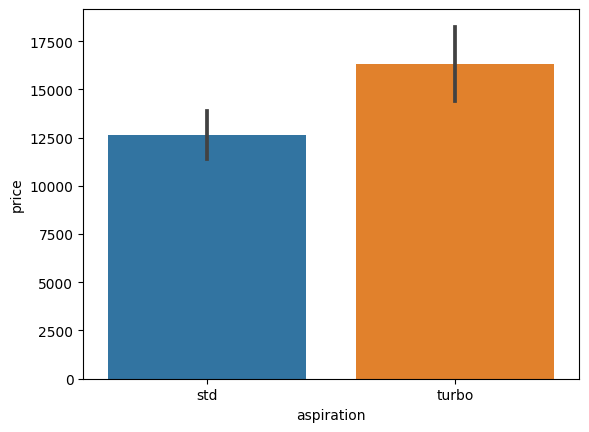

In [ ]:
sns.barplot(x=df.aspiration,y=df.price)

<Axes: xlabel='doornumber', ylabel='price'>

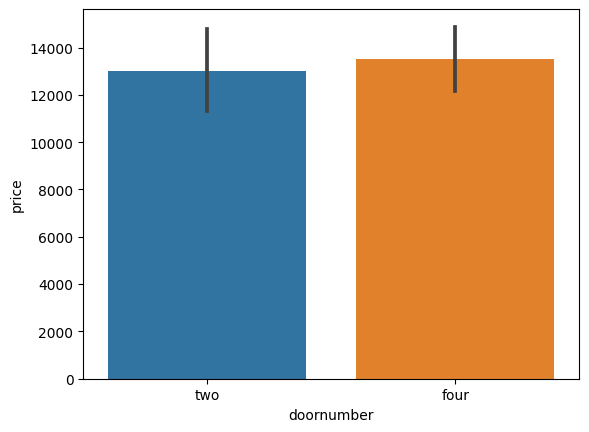

In [ ]:
sns.barplot(x=df.doornumber,y=df.price)

<Axes: xlabel='carbody', ylabel='price'>

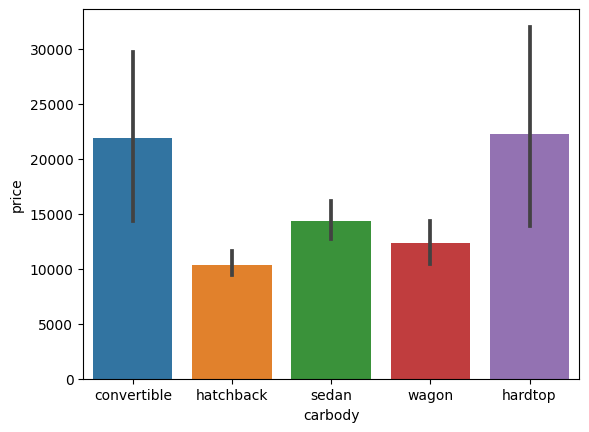

In [ ]:
sns.barplot(x=df.carbody,y=df.price)

<Axes: xlabel='drivewheel', ylabel='price'>

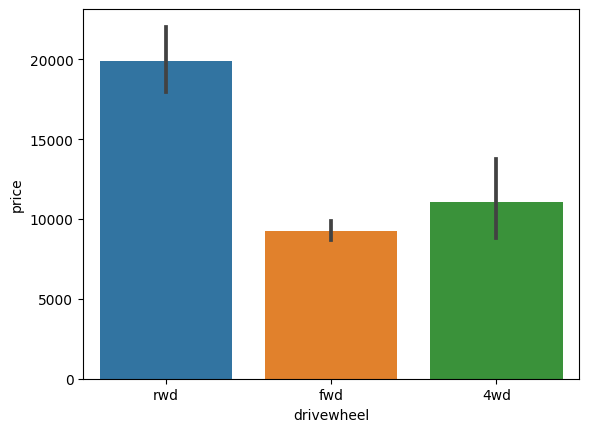

In [ ]:
sns.barplot(x=df.drivewheel,y=df.price)

In [ ]:
df.corr().price

car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [ ]:
df = df.drop(df.iloc[:,[0,2]],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
x.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [ ]:
x.doornumber.unique()

array(['two', 'four'], dtype=object)

In [ ]:
x.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
trf1 = OrdinalEncoder(categories=[['two','three','four','five','six','eight','twelve'],['two', 'four'],['std', 'turbo']])

In [ ]:
trf2 = OneHotEncoder(handle_unknown='infrequent_if_exist',drop='first')

In [ ]:
ct = ColumnTransformer(transformers = [
('ohe',trf2,['fueltype','carbody','drivewheel','enginelocation','enginetype','fuelsystem']),#,'aspiration']),
('oe',trf1,['cylindernumber','doornumber','aspiration'])],
remainder='passthrough')

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
y_test.shape

(41,)

In [ ]:
x_train = ct.fit_transform(x_train)

In [ ]:
x_train[0]

array([1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 2.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 9.37e+01,
       1.50e+02, 6.40e+01, 5.26e+01, 1.94e+03, 9.20e+01, 2.91e+00,
       3.41e+00, 9.20e+00, 7.60e+01, 6.00e+03, 3.00e+01, 3.40e+01])

In [ ]:
len(x_train[0])

36

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
x_test = ct.transform(x_test)
x_test = ss.transform(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
pred_y = lr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,pred_y)

0.8444096225807759

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dc = DecisionTreeRegressor()
dc.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = dc.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.8970947778813434

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.8795605181285984